**Problem Statement**


Your client is a retail banking institution. Term deposits are a major source
of income for a bank.
A term deposit is a cash investment held at a financial institution. Your
money is invested for an agreed rate of interest over a fixed amount of
time, or term.
The bank has various outreach plans to sell term deposits to their
customers such as email marketing, advertisements, telephonic marketing
and digital marketing.
Telephonic marketing campaigns still remain one of the most effective way
to reach out to people. However, they require huge investment as large call
centers are hired to actually execute these campaigns. Hence, it is crucial
to identify the customers most likely to convert beforehand so that they can
be specifically targeted via call.
You are provided with the client data such as : age of the client, their job
type, their marital status, etc. Along with the client data, you are also
provided with the information of the call such as the duration of the call, day
and month of the call, etc. Given this information, your task is to predict if
the client will subscribe to term deposit.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading data 
banking_df = pd.read_csv("C:\\Users\\sadys\\Downloads\\Problem Statement (6) (1)\\train.csv")
test_df = pd.read_csv("C:\\Users\\sadys\\Downloads\\Problem Statement (6) (1)\\test.csv")
banking_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## column info

ID --> Unique client ID

age -->  Age of the client

job -->  Type of job

marital -->  Marital status of the client

education -->  Education level

default -->  Credit in default

housing -->  Housing loan

loan -->  Personal loan

contact --> Type of communication

month -->  Contact month

day_of_week --> Day of week of contact

duration --> Contact duration

campaign --> number of contacts performed during this campaign to the client

pdays -->  number of days that passed by after the client was last contacted

previous -->  number of contacts performed before this campaign

poutcome -->  outcome of the previous marketing campaign

Subscribed (target) -->  has the client subscribed a term deposit?

# Data Exploration
The main purpose of data exploration is to understand what kind of data we are dealing with. Is it numerical data or categorical data. Here we try to understand what our data  consists of.
## Univariate analysis
It is used see the features of the dataframe individually the main purpose of univariate analysis is to check for skewness of the data and to check for outliers. To check skewness we use histograms(a graphical method) and describe() function(a tabular method).To check for outlies we use box plots.

In [4]:
banking_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [5]:
banking_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
# shape of dataset
banking_df.shape

(31647, 18)

In [7]:
#univariate analysis for continious variables
banking_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


describe() gives us the summary of the continious variable of the data. 25% is called 1st Quartile (Q1)and 50% is median of data , 75% is 3rd Quartile(Q3). the difference between Q3 and Q1 is called Inter Quartile Range and is often used to calculate the spread of the data. Along with IQR and Range we also use standard deviation and varinece to calculate the spread of data. It is also used to calculate wheather a data point is a outlier or not. A data point is said to be an outlier if its value is greater  than ( Q3 + 1.5 * IQR) or if its value is less than ( Q1 - 1.5 * IQR).  

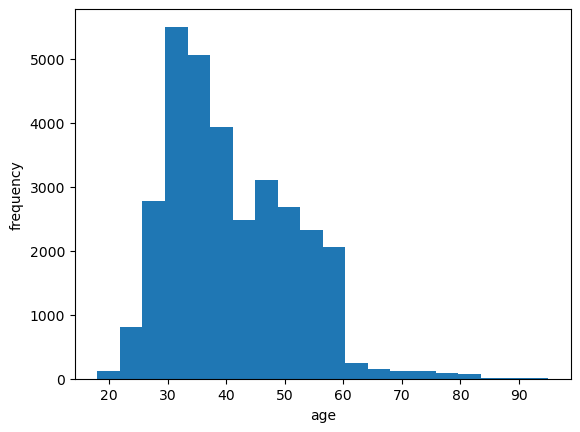

In [8]:
plt.hist(banking_df["age"],bins = 20)
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

<Axes: >

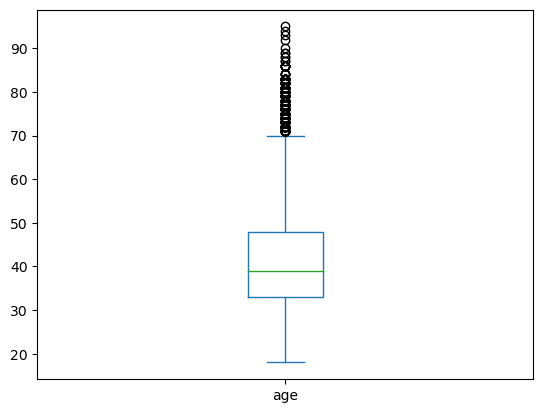

In [9]:
# checking for outliers
banking_df["age"].plot.box()


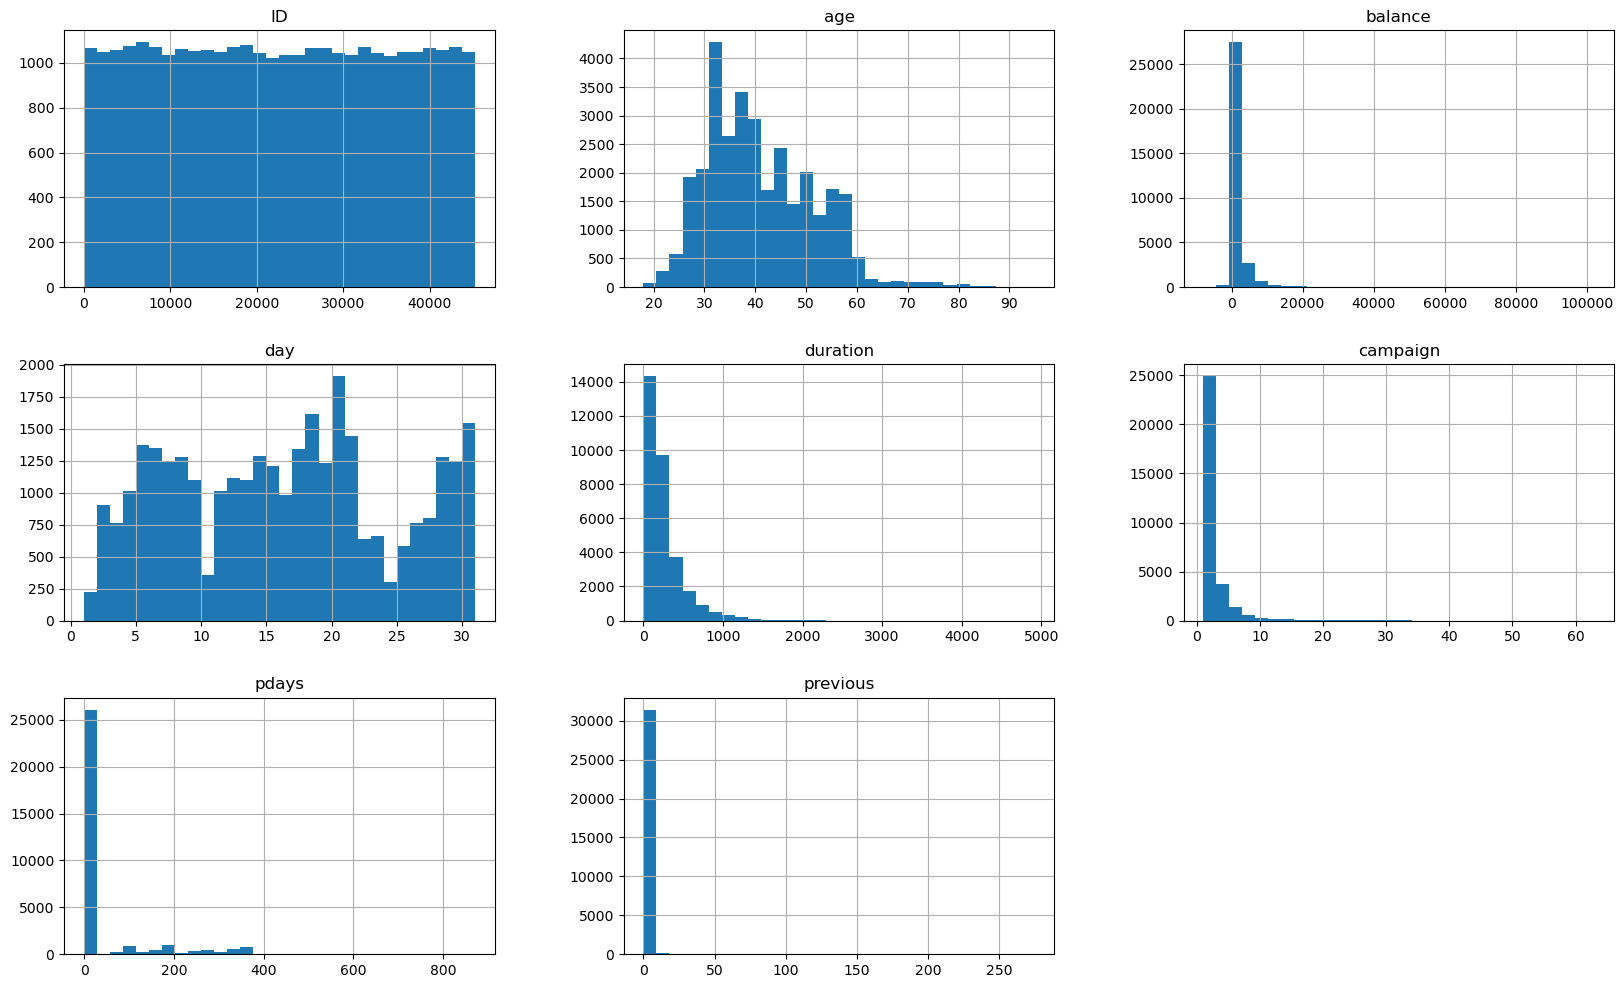

In [10]:
#Checking the skewness of data
banking_df.hist(bins = 30 , figsize = (20,12))
plt.show()

<Axes: >

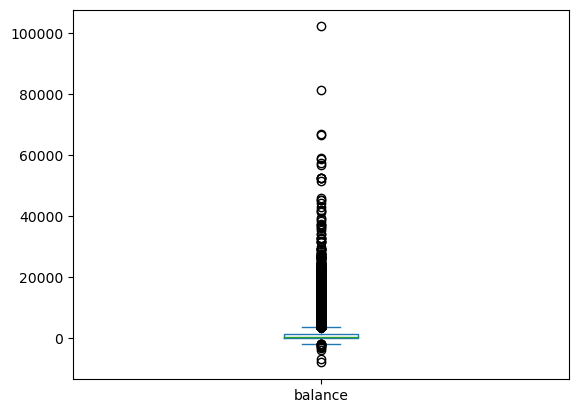

In [11]:
banking_df["balance"].plot.box()

<Axes: >

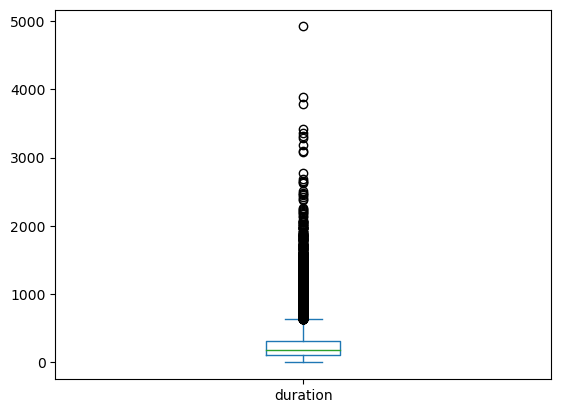

In [12]:
banking_df["duration"].plot.box()

## univariate analysis for categorical variables 

In [14]:
banking_df["job"].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<Axes: >

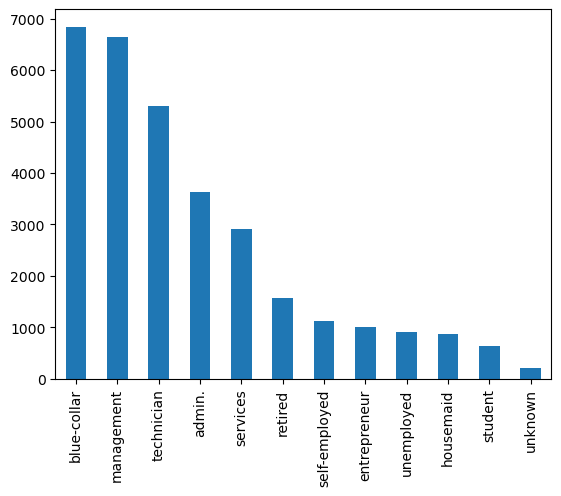

In [15]:
(banking_df["job"].value_counts()).plot.bar()

In [16]:
m_status = banking_df["marital"].value_counts()

In [17]:
m_status

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<Axes: >

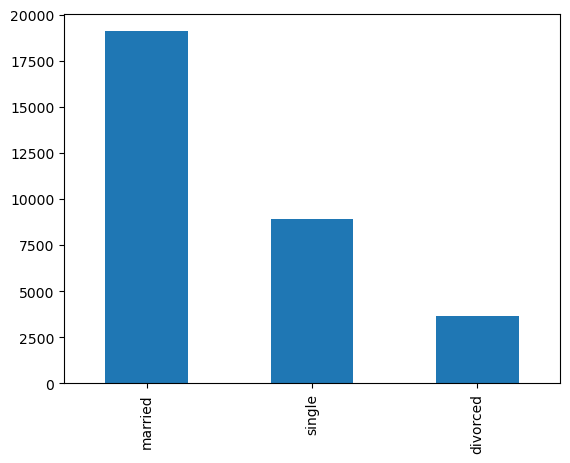

In [18]:
m_status.plot.bar()

In [19]:
edu_status = banking_df["education"].value_counts()
edu_status

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

<Axes: >

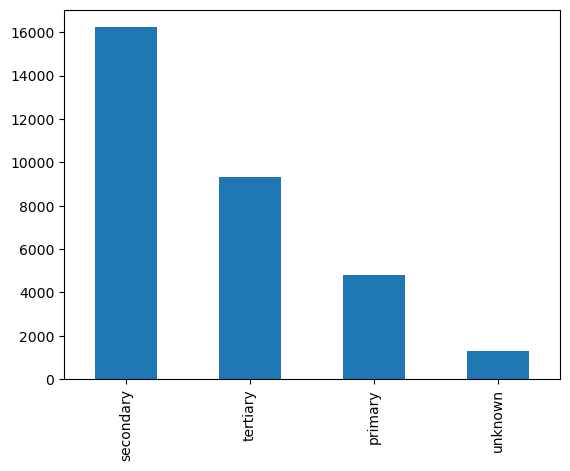

In [20]:
edu_status.plot.bar()

In [21]:
con = banking_df["contact"].value_counts()
con

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

<Axes: >

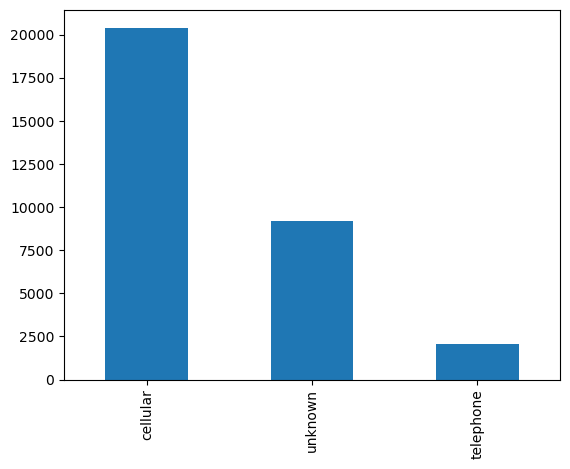

In [22]:
con.plot.bar()

## Bivariate Analysis

Bivariate analysis is done to find the relationship between two features of the dataframe.
## continious - continious bivariate analysis 

In [23]:
banking_df.corr()

C:\Users\sadys\AppData\Local\Temp\ipykernel_14596\1367068498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  banking_df.corr()


,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


By seeing the correlation matrix between continious variables one can say that none of the variables are strongly correlated to each other.But the feature pdays and previous are weakly correlated let's visualize this relation using scatter plot.

<Axes: xlabel='pdays', ylabel='previous'>

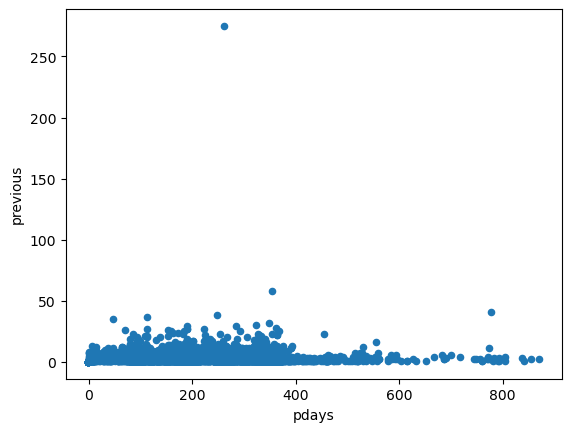

In [24]:
banking_df.plot(kind = 'scatter', x = 'pdays', y = 'previous')

here both the variables used are continious in nature and for continious-continious bivariate analysis we use corr() function and scatter plots. Now as this dataframe consists of categorical variables also we will also do bivariate analysis for continious-categorical variable and categorical-categorical variables.

## continious- categorical bivariate analysis 

let's see the relationship between age and marital features of the dataframe. 



In [25]:
banking_df.groupby("marital")["age"].mean()

marital
divorced    45.945455
married     43.401885
single      33.695696
Name: age, dtype: float64

<Axes: xlabel='marital'>

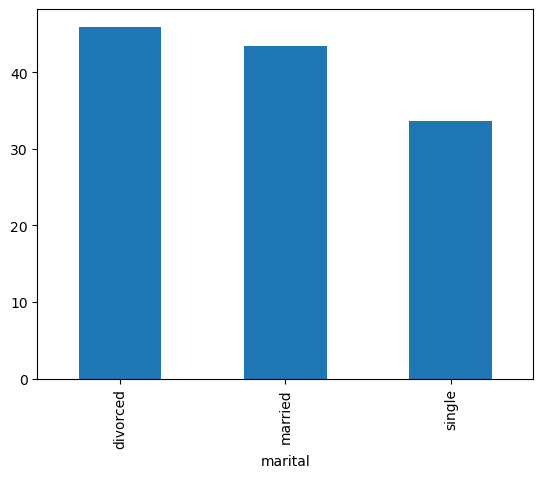

In [26]:
banking_df.groupby("marital")["age"].mean().plot.bar()

from the above bar graph we can see that there is a difference between the mean age of single people and marital people. But is this differnce siginficant or not . to see this we will use 2 sample ttest. 

In [27]:
from scipy.stats import ttest_ind

In [28]:
married = banking_df[banking_df["marital"]=='married']
single = banking_df[banking_df["marital"]== 'single']
divorced = banking_df[banking_df["marital"]=='divorced']

In [29]:
married.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes


In [30]:
ttest_ind(married["age"],single["age"],nan_policy = 'omit')

Ttest_indResult(statistic=79.83015069007807, pvalue=0.0)

here we got the pvlaue 0 which means that there is a significant difference between the age of married people and single people.
Now let us see the difference between the age of married people to divorced people. 


In [31]:
ttest_ind(married["age"],divorced["age"],nan_policy="omit") # nan_policy is use to deal with missing values as the ttest will retun an error if it encounters a missing values  

Ttest_indResult(statistic=-13.72251515997225, pvalue=1.1017452039916695e-42)

here the pvalue is much less than the sigificance level(0.05) so it means that there is a significant differnce between the ages of married people and divorced people 

In [32]:
banking_df.groupby("education")["balance"].mean()

education
primary      1263.221506
secondary    1149.858420
tertiary     1763.573917
unknown      1545.785388
Name: balance, dtype: float64

<Axes: xlabel='education'>

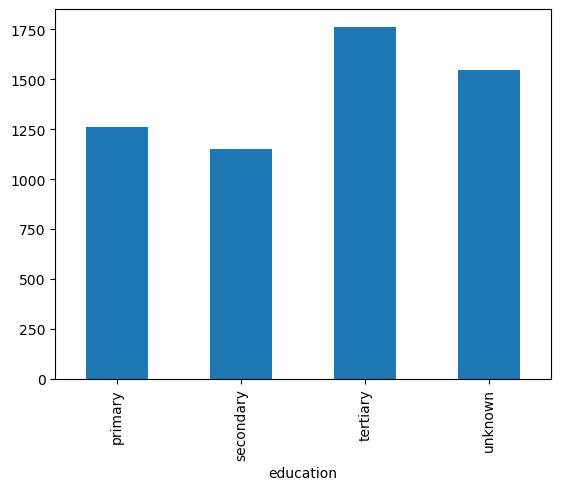

In [33]:
banking_df.groupby("education")["balance"].mean().plot.bar()

In [34]:
banking_df.groupby("subscribed")["balance"].mean()

subscribed
no     1307.779822
yes    1785.768237
Name: balance, dtype: float64

<Axes: xlabel='subscribed'>

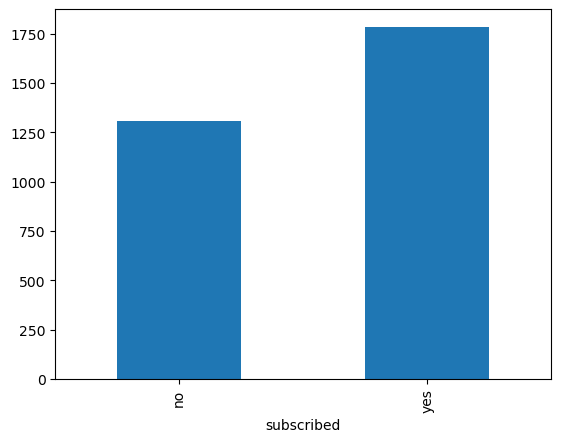

In [35]:
banking_df.groupby("subscribed")["balance"].mean().plot.bar()

In [36]:
# seperating the dataframe into two based on subsribed
subs_yes = banking_df[banking_df["subscribed"] == "yes"]
subs_no = banking_df[banking_df["subscribed"] == "no"]

In [37]:
# performing  2 sample ttest 
ttest_ind(subs_yes["balance"],subs_no["balance"])

Ttest_indResult(statistic=9.049746289617076, pvalue=1.51279467766508e-19)

pvalue is less than sigificance value. therefore there is a significant difference between the income of people who subscribed and the people who haven't subscribed to the term plan.

## categorical- categorical bivariate analysis 

to do this type of analysis we create 2way table . 

In [38]:
pd.crosstab(banking_df["job"],banking_df["subscribed"])

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


<Axes: xlabel='job'>

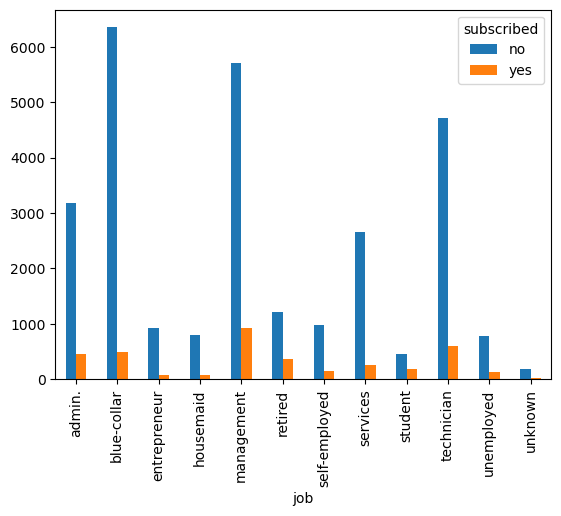

In [39]:
pd.crosstab(banking_df["job"],banking_df["subscribed"]).plot.bar()

In [40]:
pd.crosstab(banking_df["contact"],banking_df["subscribed"])

subscribed,no,yes
contact,,
cellular,17352,3071
telephone,1779,268
unknown,8801,376


<Axes: xlabel='contact'>

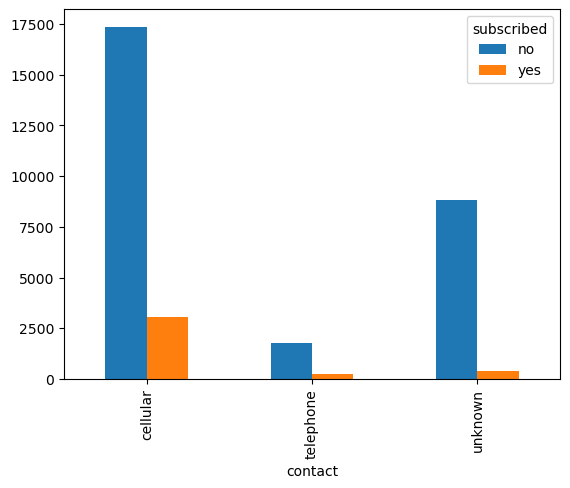

In [41]:
pd.crosstab(banking_df["contact"],banking_df["subscribed"]).plot.bar()

In [42]:
from scipy.stats import chi2_contingency

In [43]:
chi2_contingency(pd.crosstab(banking_df["job"],banking_df["subscribed"]))

Chi2ContingencyResult(statistic=588.7312904892925, pvalue=3.6010336114362163e-119, dof=11, expected_freq=array([[3204.76165197,  426.23834803],
       [6038.82655544,  803.17344456],
       [ 889.67219642,  118.32780358],
       [ 771.40228142,  102.59771858],
       [5859.65646033,  779.34353967],
       [1389.2301956 ,  184.7698044 ],
       [ 991.1724966 ,  131.8275034 ],
       [2562.22062123,  340.77937877],
       [ 560.45817929,   74.54182071],
       [4684.01820078,  622.98179922],
       [ 798.7632319 ,  106.2367681 ],
       [ 181.81792903,   24.18207097]]))

In [44]:
chi2_contingency(pd.crosstab(banking_df["contact"],banking_df["subscribed"]))

Chi2ContingencyResult(statistic=735.2595868437653, pvalue=2.1898246172294052e-160, dof=2, expected_freq=array([[18025.5707018 ,  2397.4292982 ],
       [ 1806.70534332,   240.29465668],
       [ 8099.72395488,  1077.27604512]]))

## The next step in Data Exploration is to **treat the missing values**

In [45]:
#to see wheather data has missing values 
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [46]:
#another way for finding missing values
banking_df.isnull().sum()
#banking_df.dropna()   used to drop all the rows having missing values
# banking_df.dropna(how = "all")  it will drop all the row which have no values in it. In other words it will drop all the empty rows. 
# banking_df.dropna(axis = 1 )   it will drop all the columns which have missing values
# banking_df.fillna(value, inplace = "True" or " false") it will all the missing values with the value specified by you. 

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

To treat missing values we can either **remove the rows which has missing values** or we can **impute the data**

here in our dataframe we don't have any missing values

## Handling outliers 
During the univariate analysis we have detected the presence of outliers in our data . The next step in **Data Exploration** is to **handle these outliers**.

To deal with outliers we can use three methods:-

1.**Delete the observations** - loss of data.

2.**Transform and Binning values** - we use tansformation like logrithimic transformation

3.**Impute the values** - replace the outliers with mean , median or mode.

4.**Treat them differently** 

before handling the outliers let us fist idendify them . So there are two methods to identify the outliers first is with the help of **univariate analysis** which we have seen earlier also ie. by using box plots and another is with the help of **bivariate analysis** ie. by using scatter plots.

###  Identifying the outliers by using univariate analysis . 

<Axes: >

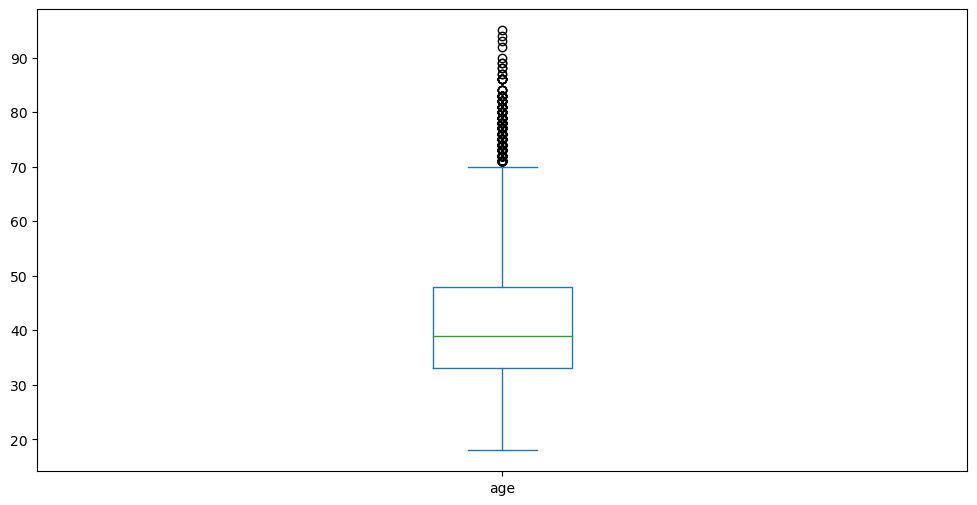

In [47]:
banking_df["age"].plot.box(figsize = (12,6))

<Axes: >

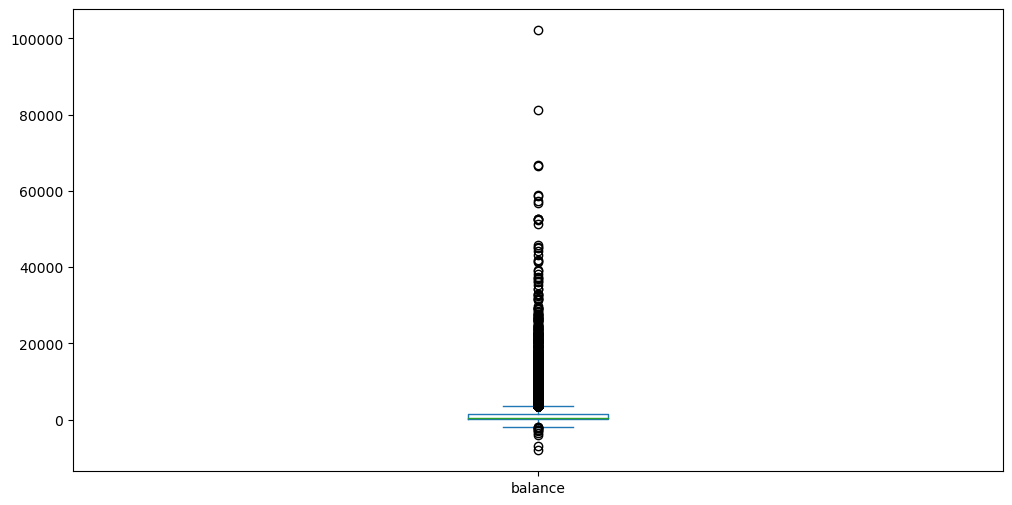

In [48]:
banking_df["balance"].plot.box(figsize = (12,6))

<Axes: >

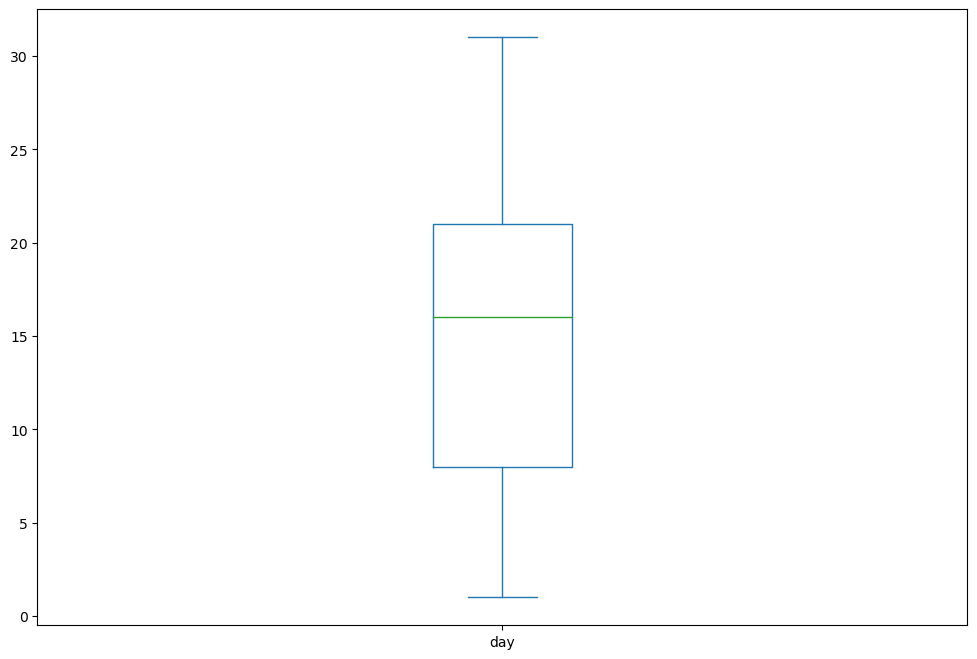

In [49]:
banking_df["day"].plot.box(figsize = (12,8))

<Axes: >

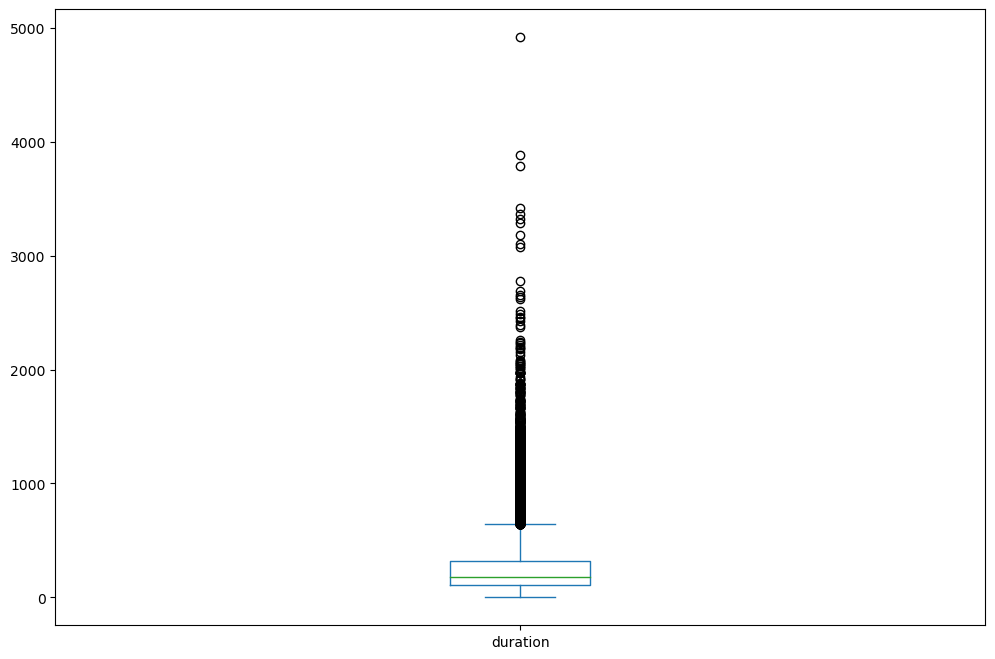

In [50]:
banking_df["duration"].plot.box(figsize = (12,8)) 

<Axes: >

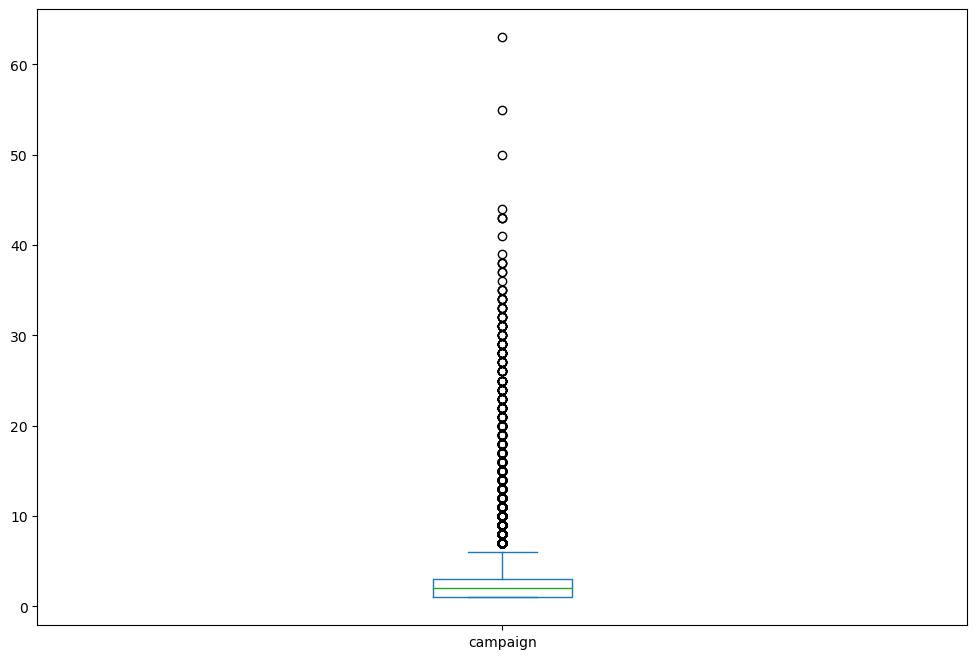

In [51]:
banking_df["campaign"].plot.box(figsize = (12,8))

### Bivariate analysis to identify outliers

In [52]:
banking_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

<Axes: xlabel='age', ylabel='balance'>

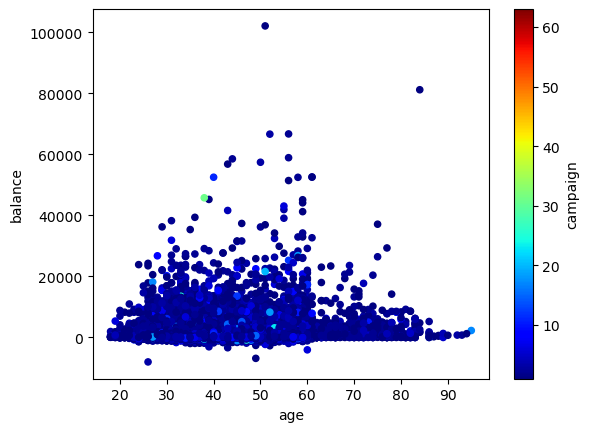

In [53]:
# checking age and balance 
banking_df.plot(kind = "scatter" , x = "age", y = "balance" , cmap = "jet", c = "campaign")

<Axes: xlabel='campaign', ylabel='duration'>

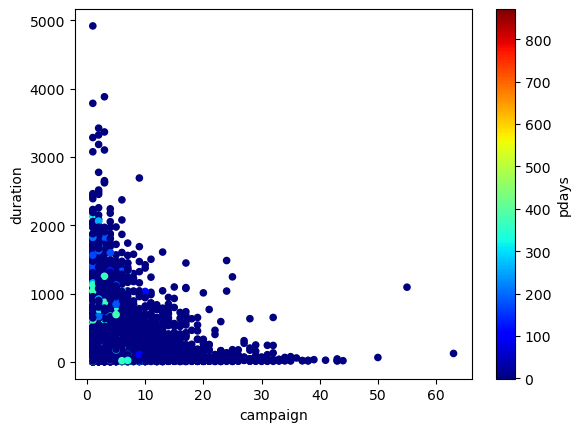

In [54]:
# to see the outlies of campaign and duration 
banking_df.plot(kind = 'scatter' , x = "campaign" , y  = "duration" , cmap = "jet" , c = "pdays")

Now, we know that our data consists of many outliers. So let us first understand how outliers affect our analysis and learning of the machine learning algorithms. 

It will be easy to understand through an example suppose you have a numbers form 1 to 5 now the mean of these will be (1+2+3+4+5) / 5 = 3 , now suppose we have done a mistake and written 100 instead of 5 . so our new sum is 110 and the mean will
 22 which is much greater than our previous mean ie. 3.

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
banking_num = banking_df.select_dtypes(include = [np.number])
imputer.fit(banking_num)

SimpleImputer(strategy='median')

In [56]:
imputer.statistics_

array([ 2.2519e+04,  3.9000e+01,  4.5000e+02,  1.6000e+01,  1.8000e+02,
        2.0000e+00, -1.0000e+00,  0.0000e+00])

In [57]:
X =imputer.transform(banking_num)


In [58]:
banking_transformed = pd.DataFrame(X,columns=banking_num.columns, index = banking_num.index)
banking_transformed.head()

,ID,age,balance,day,duration,campaign,pdays,previous
0,26110.0,56.0,1933.0,19.0,44.0,2.0,-1.0,0.0
1,40576.0,31.0,3.0,20.0,91.0,2.0,-1.0,0.0
2,15320.0,27.0,891.0,18.0,240.0,1.0,-1.0,0.0
3,43962.0,57.0,3287.0,22.0,867.0,1.0,84.0,3.0
4,29842.0,31.0,119.0,4.0,380.0,1.0,-1.0,0.0


In [59]:
banking_transformed.shape

(31647, 8)

In [60]:
#removing the outliers 
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest()
outlier_pred = isolation_forest.fit_predict(X)
outlier_pred

array([ 1,  1,  1, ...,  1, -1, -1])

In [61]:
banking_df = banking_df.iloc[outlier_pred == 1]

In [62]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27605 entries, 0 to 31644
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          27605 non-null  int64 
 1   age         27605 non-null  int64 
 2   job         27605 non-null  object
 3   marital     27605 non-null  object
 4   education   27605 non-null  object
 5   default     27605 non-null  object
 6   balance     27605 non-null  int64 
 7   housing     27605 non-null  object
 8   loan        27605 non-null  object
 9   contact     27605 non-null  object
 10  day         27605 non-null  int64 
 11  month       27605 non-null  object
 12  duration    27605 non-null  int64 
 13  campaign    27605 non-null  int64 
 14  pdays       27605 non-null  int64 
 15  previous    27605 non-null  int64 
 16  poutcome    27605 non-null  object
 17  subscribed  27605 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.0+ MB


In [63]:
banking_df['subscribed'].replace('no', 0,inplace=True)
banking_df['subscribed'].replace('yes', 1,inplace=True)

C:\Users\sadys\AppData\Local\Temp\ipykernel_14596\1407721434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking_df['subscribed'].replace('no', 0,inplace=True)
C:\Users\sadys\AppData\Local\Temp\ipykernel_14596\1407721434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking_df['subscribed'].replace('yes', 1,inplace=True)


In [64]:
banking_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,0


In [65]:
target = banking_df["subscribed"]

In [66]:
banking_df = banking_df.drop("subscribed",axis = 1)

In [67]:
df = pd.get_dummies(banking_df) 


get_dummies() is used to deal with categorical values . there are other methods also like One Hot Encoding , label encoding and ordinal encoding which we can use to deal with categorical variables.

In [68]:
df.shape

(27605, 52)

In [69]:
df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,29390,33,0,2,116,3,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


The data is ready for the training of the machine learning algo.  

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_val, y_train, y_val = train_test_split(df, target, test_size = 0.3, random_state=42)

# Training the model 

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
tree_clf = DecisionTreeClassifier()

In [85]:
model = tree_clf.fit(X_train,y_train)
model

DecisionTreeClassifier()

In [87]:
#getting predictions on validation test 
val_pred =  model.predict(X_val)
val_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, val_pred)

0.9069065443129679

got 90% accuracy on validation set Now lets test our model on test set. 


In [99]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rfc = RandomForestClassifier()

In [110]:
model2 = rfc.fit(X_train,y_train)

In [111]:
prediction_valdiation = model2.predict(X_val)

In [112]:
# accuracy of prediction of random forest classifier 
accuracy_score(y_val,prediction_valdiation)

0.9240521613136924

In [113]:
test = pd.get_dummies(test_df)

In [114]:
test_pre = model2.predict(test)
test_pre

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [115]:
final = pd.DataFrame()

In [116]:
final["ID"] = test_df["ID"]
final["subscribed"] = test_pre

In [117]:
final["subscribed"].replace(1,"yes",inplace = True)
final["subscribed"].replace(0,"no",inplace = True)

In [118]:
final.head()

,ID,subscribed
0,38441,no
1,40403,no
2,3709,no
3,37422,no
4,12527,no


In [119]:
final.to_csv('final_solution.csv', header=True, index=False)